In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
insurance_data=pd.read_csv('sbi.csv')
insurance_data

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [3]:
df=pd.DataFrame(data=insurance_data)
df

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1
5,31,0,25.740,0,0,2,3756.62160,0
6,46,0,33.440,1,0,2,8240.58960,1
7,37,0,27.740,3,0,1,7281.50560,0
8,37,1,29.830,2,0,0,6406.41070,0
9,60,0,25.840,0,0,1,28923.13692,0


In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,3,0,1,10600.5483,0
1334,18,0,31.92,0,0,0,2205.9808,1
1335,18,0,36.85,0,0,2,1629.8335,1
1336,21,0,25.80,0,0,3,2007.9450,0
1337,61,0,29.07,0,1,1,29141.3603,1


In [6]:
df.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [7]:
df.shape

(1338, 8)

In [8]:
df.dtypes

age                 int64
sex                 int64
bmi               float64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

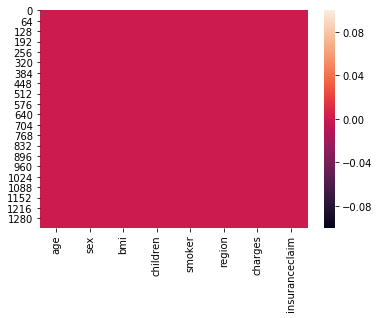

In [9]:
sns.heatmap(df.isnull())

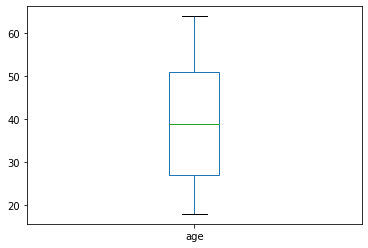

In [10]:
df['age'].plot.box()

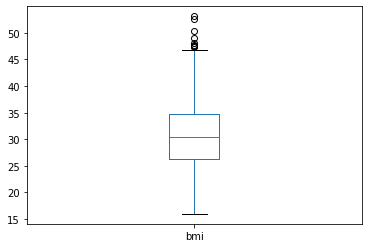

In [11]:
df['bmi'].plot.box()

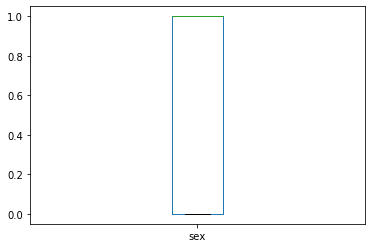

In [12]:
df['sex'].plot.box()

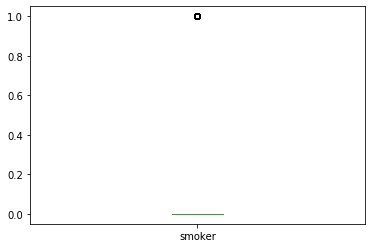

In [13]:
df['smoker'].plot.box()

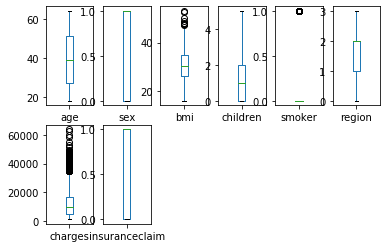

In [14]:
df.plot(kind='box',subplots=True,layout=(2,6))
plt.show()

In [15]:
x=df.iloc[:,0:8]
y=df.iloc[:,-1]

In [16]:
x.shape

(1338, 8)

In [17]:
y.shape

(1338,)

In [18]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.22,random_state=42)

In [19]:
train_x.shape

(1043, 8)

In [20]:
test_x.shape

(295, 8)

In [21]:
train_y.shape

(1043,)

In [22]:
test_y.shape

(295,)

In [23]:
lg=LogisticRegression()

In [24]:
lg.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
pred=lg.predict(test_x)
print(pred)

[1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0
 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 0 0 1 0 0 1 0 1 0 0 1 0
 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1
 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 1 1 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 0
 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0]


In [26]:
print("accuracy score:",accuracy_score(pred,test_y))

accuracy score: 1.0


In [27]:
print(confusion_matrix(test_y,pred))

[[118   0]
 [  0 177]]


In [28]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       177

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [29]:
gnb=GaussianNB()
gnb.fit(train_x,train_y)
predgnb=gnb.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9932203389830508
[[117   1]
 [  1 176]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       118
           1       0.99      0.99      0.99       177

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295



In [30]:
svc=SVC(kernel='rbf')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predgnb))
print(confusion_matrix(test_y,predgnb))
print(classification_report(test_y,predgnb))

0.9932203389830508
[[117   1]
 [  1 176]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       118
           1       0.99      0.99      0.99       177

    accuracy                           0.99       295
   macro avg       0.99      0.99      0.99       295
weighted avg       0.99      0.99      0.99       295



In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

1.0
[[118   0]
 [  0 177]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       118
           1       1.00      1.00      1.00       177

    accuracy                           1.00       295
   macro avg       1.00      1.00      1.00       295
weighted avg       1.00      1.00      1.00       295



In [32]:
dtc=KNeighborsClassifier()
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)
preddtc=dtc.predict(test_x)
print(accuracy_score(test_y,preddtc))
print(confusion_matrix(test_y,preddtc))
print(classification_report(test_y,preddtc))

0.6406779661016949
[[ 67  51]
 [ 55 122]]
              precision    recall  f1-score   support

           0       0.55      0.57      0.56       118
           1       0.71      0.69      0.70       177

    accuracy                           0.64       295
   macro avg       0.63      0.63      0.63       295
weighted avg       0.64      0.64      0.64       295



In [ ]:
svc=SVC(kernel='poly')
svc.fit(train_x,train_y)
svc.score(train_x,train_y)
predsvc=svc.predict(test_x)
print(accuracy_score(test_y,predsvc))
print(confusion_matrix(test_y,predsvc))
print(classification_report(test_y,predsvc))

In [ ]:
y_pred_prob=lg.predict_proba(test_x)[:,1]
y_pred_prob

In [ ]:
fpr,tpr,thresholds=roc_curve(test_y,y_pred_prob)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
auc_score=roc_auc_score(test_y,lg.predict(test_x))


In [ ]:
print(auc_score)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(train_x,train_y)

In [ ]:
rfr.score(train_x,train_y)

In [ ]:
rfr=RandomForestRegressor(n_estimators=100,random_state=46)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

In [ ]:
rfr=RandomForestRegressor(n_estimators=400,random_state=56)
rfr.fit(train_x,train_y)
rfr.score(train_x,train_y)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
gbr.fit(train_x,train_y)

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=100,random_state=46)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)

In [ ]:
gbr=GradientBoostingRegressor(n_estimators=500,random_state=76)
gbr.fit(train_x,train_y)
gbr.score(train_x,train_y)